In [1]:
import pandas as pd

In [2]:
import pandas_datareader as pdr
from datetime import datetime 
import matplotlib.pylab as plt
import statsmodels.api as sms 

%matplotlib inline

In [3]:
df_airline=pd.read_csv("airline_passengers.csv")

In [4]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df_airline.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [8]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [9]:
df_airline.dropna(axis=0, inplace=True)

In [10]:
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [11]:
df_airline['Month'] =pd.to_datetime(df_airline['Month'])

In [12]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [13]:
df_airline.set_index('Month',inplace=True)

In [14]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


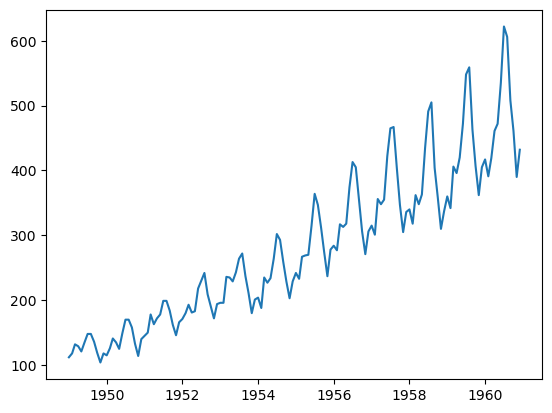

In [15]:
plt.plot(df_airline)

In [16]:
df_airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

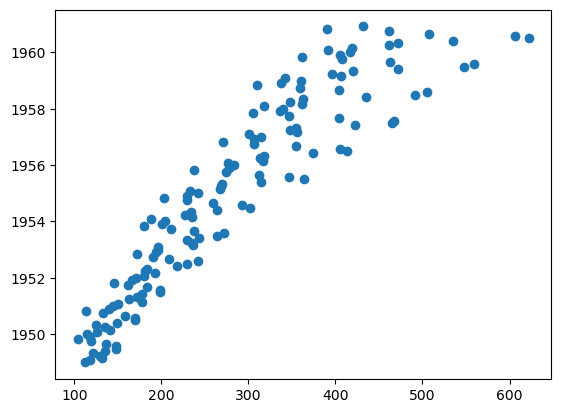

In [17]:
plt.scatter(df_airline['Thousands of Passengers'],df_airline.index)

<Axes: xlabel='Month'>

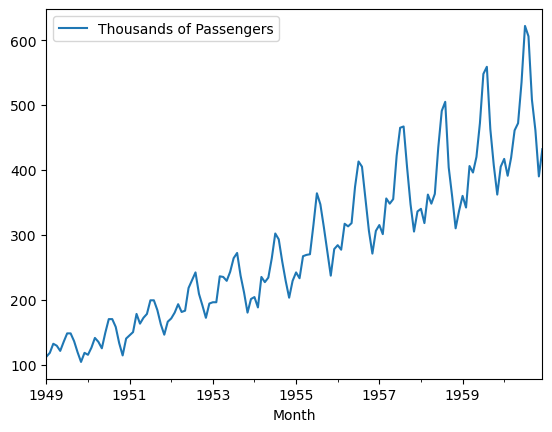

In [18]:
df_airline.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
def adf_test(series):
    result =adfuller(series)
    print("ADF Statistics: {}".format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1]<= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypotheis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against the null hypothesis, accept the null hypotheis. Timeseries has a unit root indicating it is non-stationary.")

In [21]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060597
p- value: 0.9918802434376411
Weak evidence against the null hypothesis, accept the null hypotheis. Timeseries has a unit root indicating it is non-stationary.


# Use Technique Difference 
Here we will use differencing method we can us shift(no of shift). by this it will give us moving difference. 

In [23]:
df_airline['Passengers First Difference'] =df_airline['Thousands of Passengers']=df_airline['Thousands of Passengers'].shift(1)

In [24]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,NaN,NaN
1949-02-01,112.0,112.0
1949-03-01,118.0,118.0
1949-04-01,132.0,132.0
1949-05-01,129.0,129.0


In [25]:
adf_test(df_airline['Passengers First Difference'])

MissingDataError: exog contains inf or nans